In [ ]:
import tweepy
import csv
import datetime

# Authenticate with Twitter API
consumer_key = "FxJSGJLW7w1aekEoETRwZQk6M"
consumer_secret = "oE1XaK1tNMiEIHYDyfZcISFGIezC0Y5CIEEm8hgM2nKy2N4ZqF"
access_token = "1652733378188247041-odJAXEEAinV4l819Y13ok57sHQq68T"
access_token_secret = "1SIROwMaNNYNb5VK7J66ORnk0S68s1lVxkivqA4BMfpdW"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Set search query parameters
query = "#UBuffalo OR #UBhornsUP OR #BuffaloNY OR #UBGSE OR #UBTrueBlue OR #ForeverABull OR #UB OR #ubalumni OR #SUNYAlumni OR #ubalumniassociation OR #UBAlert OR #BuffaLove OR #UBMgt OR #UBSPHHP OR #UBClassOf2023 OR #UBClassof2019 OR #UBSEAS OR #UBGivingDay OR #BuffaloStrong OR #SUNY OR #ubbulls OR #BuffaloBills OR #buffalo OR #HornsUp OR #SUNYBuffalo OR #BuffaloState OR #sunylove" + (datetime.datetime.now() - datetime.timedelta(days=7)).strftime('%Y-%m-%d')
unique_ids = set()

# Collect tweets and write to CSV file
with open('UBTweets.csv', mode='w', encoding='utf-8', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['user', 'date', 'time', 'text'])

  # Iterate through pages of search results to retrieve upto 1500 unique tweets
  for page in tweepy.Cursor(api.search_tweets, q=query, tweet_mode='extended', count=100).pages(80):
      for tweet in page:
          if not tweet.retweeted and 'RT @' not in tweet.full_text and tweet.id not in unique_ids:
              unique_ids.add(tweet.id)        

              # Collect user, date, time, and text from unique tweet
              user = tweet.user.screen_name
              date = tweet.created_at.strftime('%Y-%m-%d')
              time = tweet.created_at.strftime('%H:%M:%S')
              text = tweet.full_text       
                  
              # Write tweet data to CSV file
              writer.writerow([user, date, time, text])


In [36]:
import pandas as pd

# Set file path
file_path = '/content/Ubuffalo - UBTweets.csv'
# Read CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)
# Display DataFrame
print(df)

                 user        date      time  \
0        hittingnooks  2023-05-04  22:28:18   
1        BillsNewsNow  2023-05-04  22:28:00   
2        BillsNewsNow  2023-05-04  22:21:01   
3      DreherBaseball  2023-05-04  22:20:17   
4        LipscombXCTF  2023-05-04  22:18:42   
...               ...         ...       ...   
3357        TedBrady5  2023-04-27  14:25:26   
3358     FDU_Baseball  2023-04-27  14:22:02   
3359     bestfaredeal  2023-04-27  14:19:07   
3360  LydiaSchaefer12  2023-04-27  14:17:50   
3361   Black_Carter21  2023-04-27  14:16:24   

                                                   text  
0     The best! #Vegas #Buffalo https://t.co/MC6RNaNVln  
1     Bills get final OK from Erie County to build n...  
2     Brandon Beane glad Josh Allen plans to be “a l...  
3     Blue Devils have arrived @ Mike Johnson Park! ...  
4     With no meets happening this weekend, our team...  
...                                                 ...  
3357                         

In [37]:
# converting the data in the dataset to a valid text format
df['text'] = df['text'].astype(str)
print(df['text'])

0       The best! #Vegas #Buffalo https://t.co/MC6RNaNVln
1       Bills get final OK from Erie County to build n...
2       Brandon Beane glad Josh Allen plans to be “a l...
3       Blue Devils have arrived @ Mike Johnson Park! ...
4       With no meets happening this weekend, our team...
                              ...                        
3357                                                  nan
3358                                                  nan
3359                                                  nan
3360                                                  nan
3361                                                  nan
Name: text, Length: 3362, dtype: object


In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Define a lambda function to clean the text
clean_text = lambda text: ' '.join([word for word in nltk.word_tokenize(text.lower()) if word.isalpha() and word not in stopwords.words('english')])

# Apply the cleaning function to the text column
df['clean_text'] = df['text'].apply(clean_text)
print(df['clean_text'])

# Check for missing values
print("Number of missing values:", df['clean_text'].isnull().sum())

# Check for non-empty values
print("Number of non-empty values:", len(df['clean_text']) - df['clean_text'].isnull().sum())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                best vegas buffalo https
1       bills get final ok erie county build new stadi...
2       brandon beane glad josh allen plans little bit...
3       blue devils arrived mike johnson park let go h...
4       meets happening weekend team focused start asu...
                              ...                        
3357                                                  nan
3358                                                  nan
3359                                                  nan
3360                                                  nan
3361                                                  nan
Name: clean_text, Length: 3362, dtype: object
Number of missing values: 0
Number of non-empty values: 3362


In [40]:
from transformers import pipeline
import pandas as pd

# Initialize sentiment-analysis pipeline
classifier = pipeline('sentiment-analysis')

# Retrieve text from DataFrame
tweets = df['text'].tolist()

# Classify sentiment for each tweet using the pipeline
results = classifier(tweets)

# Extract sentiment labels from the pipeline output
sentiments = [result['label'] for result in results]

# Create a new DataFrame with tweet text and corresponding sentiment labels
df_labels = pd.DataFrame({'text': df['clean_text'], 'sentiment': sentiments})

# Print the head of the new DataFrame
print(df_labels.head())

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                                text sentiment
0                           best vegas buffalo https  POSITIVE
1  bills get final ok erie county build new stadi...  NEGATIVE
2  brandon beane glad josh allen plans little bit...  NEGATIVE
3  blue devils arrived mike johnson park let go h...  NEGATIVE
4  meets happening weekend team focused start asu...  NEGATIVE


In [41]:
# replace sentiment labels with binary values
df_labels['sentiment'] = df_labels['sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

# print the shape and head of the dataset
print(df_labels.shape)
print(df_labels.head())

(3362, 2)
                                                text  sentiment
0                           best vegas buffalo https          1
1  bills get final ok erie county build new stadi...          0
2  brandon beane glad josh allen plans little bit...          0
3  blue devils arrived mike johnson park let go h...          0
4  meets happening weekend team focused start asu...          0


In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Define text data
text_data = df_labels['text']

# Create a bag-of-words matrix
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(text_data)

# Create a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5, ngram_range=(1,2))
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Print the shape of the matrices
print("Bag-of-words matrix shape:", bow_matrix.shape)
print("TF-IDF matrix shape:", tfidf_matrix.shape)
print(bow_matrix.toarray())

Bag-of-words matrix shape: (3362, 10487)
TF-IDF matrix shape: (3362, 2442)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
import numpy as np
# Get the vocabulary of the bag-of-words matrix
bow_vocab = vectorizer.vocabulary_

# Get the vocabulary of the TF-IDF matrix
tfidf_vocab = tfidf_vectorizer.vocabulary_

# Print the number of unique words in each vocabulary
print("Number of unique words in bag-of-words vocabulary:", len(bow_vocab))
print("Number of unique words in TF-IDF vocabulary:", len(tfidf_vocab))

sparsity = 100 * (1 - np.count_nonzero(tfidf_matrix.toarray()) / np.prod(tfidf_matrix.shape))
print(sparsity)

Number of unique words in bag-of-words vocabulary: 10487
Number of unique words in TF-IDF vocabulary: 2442
99.46554228231801


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, GRU, Dense
from tensorflow.keras.optimizers import Adam

# Split the data into training and test sets
X = df_labels['text'].values
y = df_labels['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(X_train[:5])
print(y_train[:5])

(2689,)
(2689,)
(673,)
(673,)
['last week history students ashley morin jenna labbie fiona serrano mia delap brian murphy cari casteel participated iibuff community world trivia competition ubuffalo https'
 'grader grace clifton first serve grade night vs east carter lady devils got win rdn hornsup ace https'
 'tee times ndsu morning gobison hornsup https'
 'nfl draft mock bills could market receiver buffalobills buffalo gobills billsnation yahoo https'
 'update buffalobills billboard https']
[0 1 0 0 0]


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, GRU, Dense
from tensorflow.keras.optimizers import Adam

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_labels['text'])
sequences = tokenizer.texts_to_sequences(df_labels['text'])

# Pad sequences
padded_sequences = pad_sequences(sequences)

# Define model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100),
    LSTM(64, return_sequences=True),
    Conv1D(64, 3, activation='relu'),
    GRU(32),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model
history = model.fit(padded_sequences, df_labels['sentiment'], epochs=10, validation_split=0.2)


Epoch 1/10
85/85 [==============================] - 21s 122ms/step - loss: 0.5492 - accuracy: 0.7189 - val_loss: 0.5328 - val_accuracy: 0.7429
Epoch 2/10
85/85 [==============================] - 7s 77ms/step - loss: 0.2399 - accuracy: 0.9093 - val_loss: 0.6421 - val_accuracy: 0.7266
Epoch 3/10
85/85 [==============================] - 8s 98ms/step - loss: 0.1094 - accuracy: 0.9636 - val_loss: 0.7237 - val_accuracy: 0.7251
Epoch 4/10
85/85 [==============================] - 7s 77ms/step - loss: 0.0570 - accuracy: 0.9807 - val_loss: 0.8025 - val_accuracy: 0.7236
Epoch 5/10
85/85 [==============================] - 8s 89ms/step - loss: 0.0334 - accuracy: 0.9903 - val_loss: 0.9641 - val_accuracy: 0.7415
Epoch 6/10
85/85 [==============================] - 7s 77ms/step - loss: 0.0169 - accuracy: 0.9963 - val_loss: 1.0774 - val_accuracy: 0.7400
Epoch 7/10
85/85 [==============================] - 8s 91ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 1.3047 - val_accuracy: 0.6969
Epoch 8/10


In [48]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_labels['sentiment'], test_size=0.2, random_state=42)

# Get predictions on test set
y_pred_probs = model.predict(X_test)
y_pred_binary = np.round(y_pred_probs).astype(int)

# Get classification metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# confusion matrix 
confusion = confusion_matrix(y_test, y_pred_binary)

# Get classification metrics
report = classification_report(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Classification report:\n', report)
print('Confusion matrix:\n', confusion)

22/22 [==============================] - 1s 16ms/step
Accuracy: 0.9494799405646359
Precision: 0.9315068493150684
Recall: 0.9147982062780269
F1-score: 0.923076923076923
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       450
           1       0.93      0.91      0.92       223

    accuracy                           0.95       673
   macro avg       0.94      0.94      0.94       673
weighted avg       0.95      0.95      0.95       673

Confusion matrix:
 [[435  15]
 [ 19 204]]


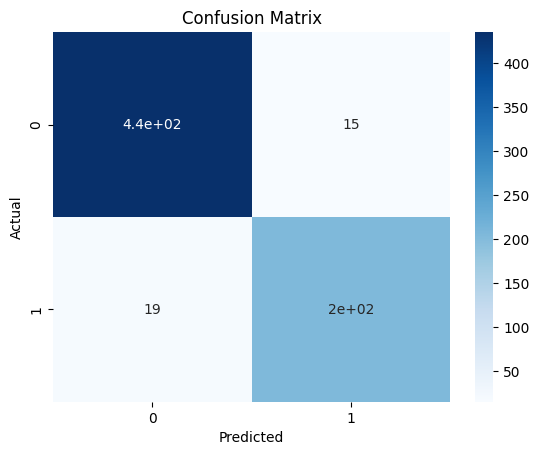

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:
# Example sentences of UB
sentences = [
    "UB ranks among top 30 well-developed public universities in the nation, according to U.S. News & World Report.",
    "I've had a terrible experience with the weather at Buffalo.",
    "The courses at UB were engaging and a few courses were really hard for me to study.",
    "UB researchers were amazing in discovering new class of materials for next-generation energy storage.",
    "UB's campus is beautiful but it's hard to find a quiet place to study.",
    "The first phase of comprehensive wellness initiative launched by UB was fantastic!",
    "I've had multiple negative experiences with UB's health services.",
    "UB School of Law's Trial Advocacy Program named among best in nation.",
    "UB chemist receives prestigious award for his work on energy conversion and storage.",
    "UB's administration is slow to respond to student concerns and complaints."
]

# Tokenize and pad sequences for the sample sentences
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Make predictions
predictions = model.predict(padded_sequences)

# Convert probabilities to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Print results
for i in range(len(sentences)):
    print("Sentence:", sentences[i])
    print("Sentiment:", "Positive" if binary_predictions[i] == 1 else "Negative")
    print("Probability:", predictions[i])
    print("\n")


1/1 [==============================] - 0s 52ms/step
Sentence: UB ranks among top 30 well-developed public universities in the nation, according to U.S. News & World Report.
Sentiment: Positive
Probability: [0.9969554]


Sentence: I've had a terrible experience with the weather at Buffalo.
Sentiment: Negative
Probability: [0.32389382]


Sentence: The courses at UB were engaging and a few courses were really hard for me to study.
Sentiment: Positive
Probability: [0.54298675]


Sentence: UB researchers were amazing in discovering new class of materials for next-generation energy storage.
Sentiment: Positive
Probability: [0.9856182]


Sentence: UB's campus is beautiful but it's hard to find a quiet place to study.
Sentiment: Positive
Probability: [0.97418296]


Sentence: The first phase of comprehensive wellness initiative launched by UB was fantastic!
Sentiment: Negative
Probability: [0.00076006]


Sentence: I've had multiple negative experiences with UB's health services.
Sentiment: Nega